In [1]:
%cd ..

c:\Users\CanAliYarman\Documents\cvprlab_zippo\cvprlab


In [ ]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

# Compute the descriptors
# Options: joint_color_hist
#          global_color_hist
#          color_hist
#          color
#          random
compute.compute_descriptors('color')
compute.compute_descriptors('joint_color_hist')
compute.compute_descriptors('global_color_hist')
compute.compute_descriptors('color_hist')
compute.compute_descriptors('random')

In [2]:
from cvpr_visualsearch import VisualSearch

vs = VisualSearch('python/descriptors/', 'MSRC_ObjCategImageDatabase_v2/Images/', 'performance')

color_descriptors = vs.load_descriptors('color')

In [3]:
import glob
glob.glob(vs.IMAGE_FOLDER)

[]

In [3]:

query_basename, retreived_images_sorted = vs.visual_search()

Performing visual search using color descriptors


QUERY 10
For top-15 Precision: 0.26666666666666666, Recall: 0.13333333333333333


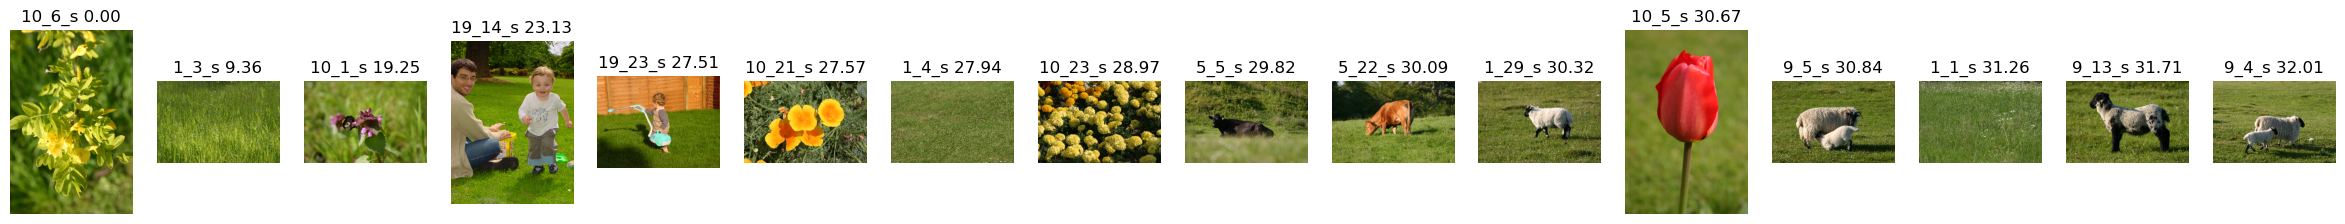

In [7]:
import matplotlib.pyplot as plt
import cv2
n = 15
f, axarr = plt.subplots(1, n+1, figsize=(30, 15)) 
DATASET_FOLDER = 'MSRC_ObjCategImageDatabase_v2/Images/'
# Left-most image is the query image
i = 0
query_label = {}
search_labels = []
precision, recall = vs.calculate_precision_recall(query_basename, retreived_images_sorted[1:], n+1)
print(f'For top-{n} Precision: {precision}, Recall: {recall}')
for image_dict in retreived_images_sorted[:n+1]:
    
    # label_path = LABELS_FOLDER + image_dict['image_name'].split('.')[0] + '_GT.json'
    # with open(label_path) as json_file:
    #     data = json.load(json_file)
    #     class_vector = list(data.values())

    #     if i == 0:
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 query_label[index_to_class_name[j]]= class_vector[j]
    #         # query_label = list(data.values())
    #     else:
    #         label_dict = {}
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 label_dict[index_to_class_name[j]]= class_vector[j]
    #         search_labels.append(label_dict)
    #     # dist = calculate_distance(np.array(query_label), np.array(class_vector)) labels distance

        

    image_path = DATASET_FOLDER + image_dict['image_name'] + '.bmp'
    img = cv2.imread(image_path)  # Load the image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    axarr[i].imshow(img)  # Display the image
    if i == 0:
        axarr[i].set_title(f'Query: {image_dict["image_name"]}')
    else:
        axarr[i].set_title(f'{image_dict["image_name"]}')
    axarr[i].axis('off')  # Turn off axis if you don't want the grid lines
    i+=1
plt.show()